# Handwritten Digit Recognition

In [2]:
import cv2 as cv #Read Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

### Import Datasets

In [3]:
# Datasets

mnist = tf.keras.datasets.mnist # Handwritten Digits Datasets

# Split data into test and train
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### Create Model

In [4]:
# Normalize data
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

# Create basic Neural Network
model = tf.keras.models.Sequential()

# Add layer to model
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(units = 128, activation = tf.nn.relu)) # Connect different layers together
model.add(tf.keras.layers.Dense(units = 128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(units = 10, activation = tf.nn.softmax))

In [5]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [20]:
# Train model
model.fit(x_train, y_train, epochs = 7)

# Test model
loss, accuracy = model.evaluate(x_test, y_test)

Epoch 1/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0098 - accuracy: 0.9965
Epoch 2/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0090 - accuracy: 0.9967
Epoch 3/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0110 - accuracy: 0.9966
Epoch 4/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0084 - accuracy: 0.9972
Epoch 5/7
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0072 - accuracy: 0.9977
Epoch 6/7
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0080 - accuracy: 0.9973
Epoch 7/7
313/313 [==============================] - 0s 892us/step - loss: 0.1589 - accuracy: 0.9758


In [21]:
print(f'Accuracy: {accuracy}')
print(f'Loss: {loss}')

Accuracy: 0.9757999777793884
Loss: 0.1589384377002716


In [22]:
model.save('digits.model')

INFO:tensorflow:Assets written to: digits.model\assets


INFO:tensorflow:Assets written to: digits.model\assets


# Test with real data

1/1 [==============================] - 0s 15ms/step


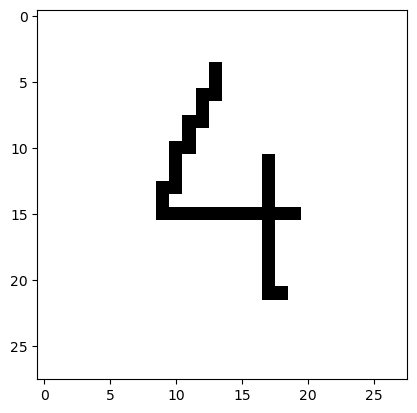

Prediction: 4
1/1 [==============================] - 0s 14ms/step


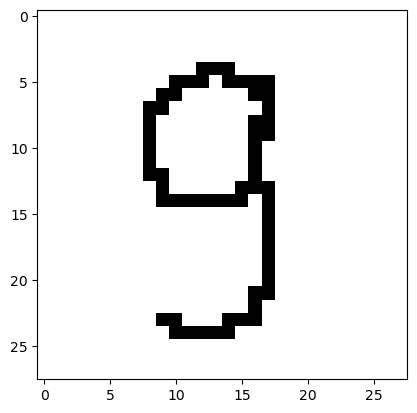

Prediction: 3
1/1 [==============================] - 0s 14ms/step


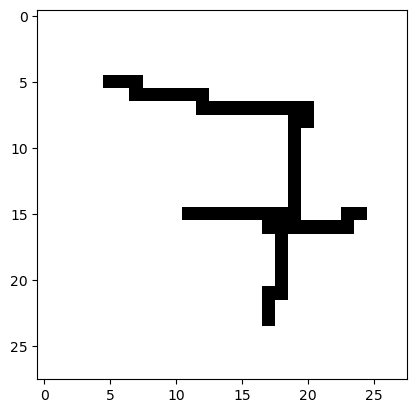

Prediction: 7
1/1 [==============================] - 0s 15ms/step


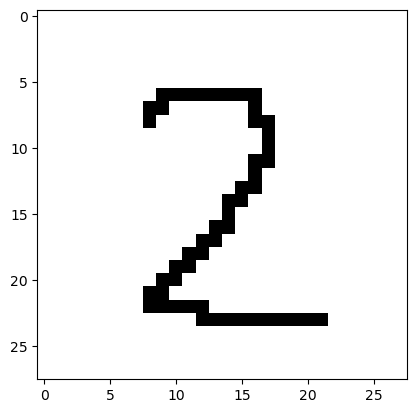

Prediction: 2


In [24]:
for x in range(1, 5):
    img = cv.imread(f'{x}.png')[:,:,0] # Read image from file
    img = np.invert(np.array([img])) # Change image to black on white so model can read
    predict = model.predict(img) # Get result
    
    # Plot out pictures
    plt.imshow(img[0], cmap = plt.cm.binary)
    plt.show()
    
    print(f'Prediction: {np.argmax(predict)}')